In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot, f, studentized_range

In [119]:
def teste_anova(dados):
    (I, J) = dados.shape
    QMTr = J/(I-1) * ((dados.mean(axis=1) - dados.mean())**2).sum()
    QME = dados.std(axis=1,ddof=1).mean()
    F = QMTr/QME
    print("valor-p =", f.sf(2.44, 4, 15).round(2))

In [3]:
dados = np.array([
    [655.5, 788.3, 734.3, 721.4, 679.1, 699.4],
    [782.9, 772.5, 786.9, 686.1, 732.1, 774.8],
    [737.1, 639.0, 696.3, 671.7, 717.2, 727.1],
    [535.1, 628.7, 542.4, 559.0, 586.9, 520.0]
])

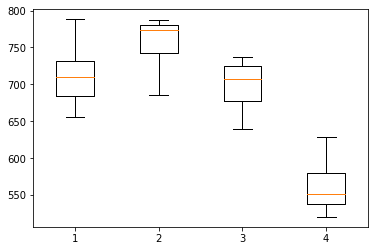

In [88]:
plt.boxplot(dados.T)
plt.show()

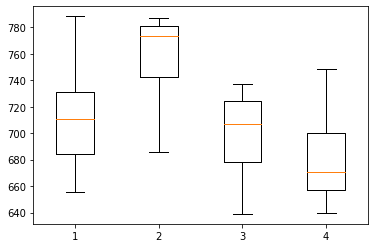

In [87]:
plt.boxplot((dados + np.array([0,0,0,120]).reshape(-1,1)).T)
plt.show()

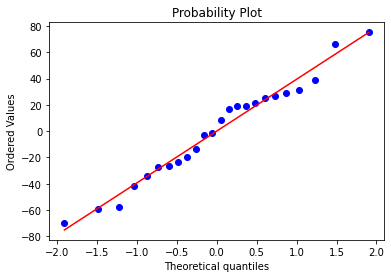

In [24]:
normalidade = (dados - dados.mean(axis=1).reshape(-1,1)).reshape(-1)
fig, ax = plt.subplots()
probplot(normalidade, fit=True, plot=ax)
plt.show()

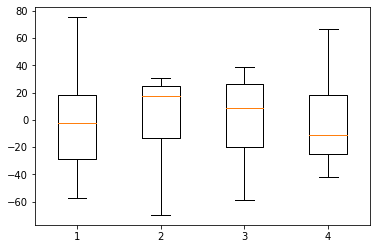

In [84]:
plt.boxplot((dados - dados.mean(axis=1).reshape(-1,1)).T)
plt.show()

In [118]:
ex2 = dados + np.array([0,0,0,120]).reshape(-1,1)
(I, J) = ex2.shape
QMTr = J/(I-1) * ((dados.mean(axis=1) - dados.mean())**2).sum()
QME = dados.std(axis=1,ddof=1).mean()
F = QMTr/QME
print("valor-p =", f.sf(2.44, 4, 15).round(2))

valor-p = 0.09


In [37]:
def tabela_anova(dados):
    (I, J) = dados.shape
    fator_de_correcao = 1/(I * J) * dados.sum() ** 2
    SQT = (dados**2).sum() - fator_de_correcao
    SQTr = 1/J * (dados.sum(axis=1)**2).sum() - fator_de_correcao
    SQE = SQT - SQTr
    QMTr = SQTr/(I-1)
    QME = SQE/(I*(J-1))
    F = QMTr/QME
    
    print("Fonte de variação\tgl\tSoma de quadrados\tQuadrado médio\tf")
    print("Tratamentos\t\t",I-1,"\t",SQTr.round(3),"\t\t\t",QMTr.round(2),"\t\t",F.round(2),sep="")
    print("Erro\t\t\t",I*(J-1),"\t",SQE.round(3),"\t\t\t",QME.round(2),sep="")
    print("Total\t\t\t",I*J - 1,"\t",SQT.round(3),sep="")
    print("\nValor-p =",f.sf(F, I-1, I*(J-1)).round(2))

In [235]:
dados6 = np.array([
    [20.5, 28.1, 27.8, 27.0, 28.0, 25.2, 25.3, 27.1, 20.5, 31.3],
    [26.3, 24.0, 26.2, 20.2, 23.7, 34.0, 17.1, 26.8, 23.7, 24.9],
    [29.5, 34.0, 27.5, 29.4, 27.9, 26.2, 29.9, 29.5, 30.0, 35.6],
    [36.5, 44.2, 34.1, 30.3, 31.4, 33.1, 34.1, 32.9, 36.3, 25.5]
])

In [250]:
tabela_anova(dados6)

Fonte de variação	gl	Soma de quadrados	Quadrado médio	f
Tratamentos		3	509.122			169.71		10.85
Erro			36	563.134			15.64
Total			39	1072.256

Valor-p = 0.0


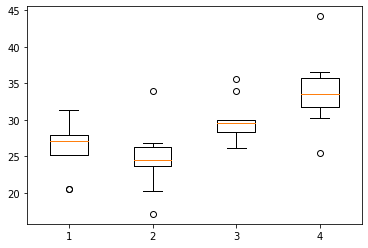

In [246]:
plt.boxplot(dados6.T)
plt.show()

# Seção 2

In [7]:
studentized_range.isf(0.05, 2, 3)

4.500658726456356

In [30]:
dados18 = np.array([
    [13, 17,  7, 14],
    [21, 13, 20, 17],
    [18, 15, 20, 17],
    [ 7, 11, 18, 10],
    [ 6, 11, 15, 8]
])

In [38]:
tabela_anova(dados18)

Fonte de variação	gl	Soma de quadrados	Quadrado médio	f
Tratamentos		4	200.3			50.07		3.49
Erro			15	215.5			14.37
Total			19	415.8

Valor-p = 0.03


In [32]:
dados18.mean(axis=1)

array([12.75, 17.75, 17.5 , 11.5 , 10.  ])

In [126]:
f.sf(1.82, 3, 51)

0.1552391792957082

In [66]:
f.isf(0.05, 4, 15)

3.055568275906593

In [148]:
def anova_tamanhos_diferentes(dados):
    I = len(dados)
    n = 0
    
    soma_global = 0
    SQT = 0
    SQTr = 0
    for amostra in dados:
        soma_global += amostra.sum()
        n += len(amostra)
        SQT += (amostra ** 2).sum()
        SQTr += (amostra.sum() ** 2)/len(amostra)
    SQT -= soma_global**2/n
    SQTr -= soma_global ** 2/n
    SQE = SQT - SQTr
    
    QMTr = SQTr/(I-1)
    QME = SQE/(n-I)
    F = QMTr/QME
    
    print("Fonte de variação\tgl\tSoma de quadrados\tQuadrado médio\tf")
    print("Tratamentos\t\t",I-1,"\t",SQTr.round(3),"\t\t\t",QMTr.round(3),"\t\t",F.round(2),sep="")
    print("Erro\t\t\t",n - I,"\t",SQE.round(3),"\t\t\t",QME.round(3),sep="")
    print("Total\t\t\t",n-1,"\t",SQT.round(3),sep="")
    print("\nValor-p =",f.sf(F, I-1, n - I).round(2))

In [153]:
dados = [
    np.array([59.5, 53.3, 56.8, 63.1, 58.1]),
    np.array([55.2, 59.1, 52.8, 54.5]),
    np.array([51.7, 48.8, 53.9, 49.0]),
    np.array([44.6, 48.5, 41.0, 47.3, 46.1])
]

In [142]:
dados = [
    np.array([45.5, 45.3, 45.4, 44.4, 44.6, 43.9, 44.6, 44.0]),
    np.array([44.2, 43.9, 44.7, 44.2, 44.0, 43.8, 44.6, 43.1]),
    np.array([46.0, 45.9, 44.8, 46.2, 45.1, 45.5]),
]

In [169]:
dados = [
    np.array([7.9, 6.2, 6.6, 8.6, 8.9, 10.1, 9.6]),
    np.array([5.7, 7.5, 9.8, 6.1, 8.4]),
    np.array([6.8, 7.5, 5.0, 7.4, 5.3, 6.1]),
    np.array([6.4, 7.1, 7.9, 4.5, 5, 4])
]

In [170]:
anova_tamanhos_diferentes(dados)

Fonte de variação	gl	Soma de quadrados	Quadrado médio	f
Tratamentos		3	23.496			7.832		3.75
Erro			20	41.778			2.089
Total			23	65.273

Valor-p = 0.03


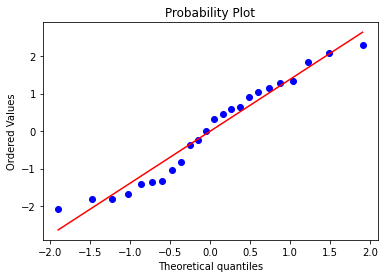

In [179]:
normalidade = np.concatenate([amostra - amostra.mean() for amostra in dados]).round(2)

fig, ax = plt.subplots()
probplot(normalidade, fit=True, plot=ax)
plt.show()

In [182]:
[amostra.std(ddof=1).round(2) for amostra in dados]

[1.46, 1.68, 1.06, 1.55]

In [187]:
[len(amostra) for amostra in dados]

[7, 5, 6, 6]

In [186]:
studentized_range.isf(0.01, 3, 30)

4.454915058145453